<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Deep_Learning_Practice/blob/master/GPT2Model_Predict_Recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the Transformers Repo

!git clone https://github.com/huggingface/transformers

Cloning into 'transformers'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 37275 (delta 6), reused 11 (delta 0), pack-reused 37249
Receiving objects: 100% (37275/37275), 27.19 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (25784/25784), done.


In [2]:
# Install packages in transformer downloaded folder

!cd transformers; pip3 install . # They both Must be in Same CommandSet

Processing /content/transformers
     |████████████████████████████████| 3.0MB 6.9MB/s 
     |████████████████████████████████| 1.1MB 50.9MB/s 
     |████████████████████████████████| 890kB 25.5MB/s 
  Created wheel for transformers: filename=transformers-3.0.2-cp36-none-any.whl size=838995 sha256=3c8542eaaf5efbf0925ad0a5f18e4508406bd16f9ebdfc46bd695f652d60f920
  Stored in directory: /tmp/pip-ephem-wheel-cache-fepc_vfh/wheels/23/19/dd/2561a4e47240cf6b307729d58e56f8077dd0c698f5992216cf
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=74ca11663db2d2d8ba52dc3ab4957978a15ca82e07f5eb964083fdb7c9d0e5e1
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built transformers sacremoses


In [3]:
# Mounting the Collab Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# EDA and Preprocessing

# Importing the Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.dpi'] = 200
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Reading the Dataset

data_1 = json.load(open('/content/drive/My Drive/Projects/GPT - 2/Natural Language Processing to Generate New Recipes/Dataset/recipes_raw_nosource_ar.json', 'r'))

In [ ]:
# JSON file is read as Dictionary in Python.

keys = list(data_1.keys())

# Pull up the Index from the Keys
data_1[keys[0]]

{'ingredients': ['4 skinless, boneless chicken breast halves ADVERTISEMENT',
  '2 tablespoons butter ADVERTISEMENT',
  '2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT',
  '1 onion, finely diced ADVERTISEMENT',
  '2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT',
  'ADVERTISEMENT'],
 'instructions': 'Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n',
 'picture_link': '55lznCYBbs2mT8BTx6BTkLhynGHzM.S',
 'title': 'Slow Cooker Chicken and Dumplings'}

In [ ]:
# We have 3 Data sources for Recipe

recipe_sources = ['ar', 'epi', 'fn']

# Build a DataFrame

df = pd.DataFrame()

# Build Features for Dataframe. Use this to append the loopers
sources, titles, ingredients, instructions = [], [], [], []

# Loop through the Sources and Append to DataFrame

for recipe_src in recipe_sources:
    data = json.load(open(f'/content/drive/My Drive/Projects/GPT - 2/Natural Language Processing to Generate New Recipes/Dataset/recipes_raw_nosource_{recipe_src}.json', 'r'))
    # Iterate over Each item (Every Entry) in Dataset and build up Iterative list of items that we care about: # Key, Value in dictionary
    for _, recipe in data.items():
        # Validate No Missing Values in the elements of dictionary
        if ('title' in recipe) and ('ingredients' in recipe) and ('instructions' in recipe):
            sources.append(recipe_src) # Name of Recipe Source
            titles.append(recipe['title']) # Recipe is a Dictionary
            ingredients.append([
                                ingredient.replace('ADVERTISEMENT', '') for ingredient in recipe['ingredients']
            ]) # List Comprehension by Replacing the words

            instructions.append(
                                str(recipe['instructions']).replace('ADVERTISEMENT', '').replace('\n', ' ')
            )

# Pass the contents to DataFrame

df['source'] = sources
df['title'] = titles
df['ingredients'] = ingredients
df['instructions'] = instructions

In [ ]:
# Validate the DataFrame
df.head().append(df.tail())

,source,title,ingredients,instructions
0,ar,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves , ...","Place the chicken, butter, soup, and onion in ..."
1,ar,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,ar,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar , 1/2 cup ketchup ...",Preheat oven to 350 degrees F (175 degrees C)....
3,ar,Best Chocolate Chip Cookies,"[1 cup butter, softened , 1 cup white sugar , ...",Preheat oven to 350 degrees F (175 degrees C)....
4,ar,Homemade Mac and Cheese Casserole,"[8 ounces whole wheat rotini pasta , 3 cups fr...",Preheat oven to 350 degrees F. Line a 2-quart ...
124642,fn,Summer Corn Salad,"[4 ears fresh corn, 2 heads Belgian endive, 2 ...",Watch how to make this recipe. Preheat a grill...
124643,fn,Zucchini Stuffed Tomatoes,"[4 large plum tomatoes, Salt and sugar, 1 1/2 ...",Preheat the broiler. Cut the tomatoes in 1/2 c...
124644,fn,Pepper Pasta Quick Cook,"[3 tablespoons olive oil, 2 tablespoons unsalt...",Heat the oil and butter in a large skillet ove...
124645,fn,Chocolate Cake with Armagnac Ice Cream,"[8 ounces butter, 8 ounces bittersweet chocola...",Preheat oven to 350 degrees. On the top half o...
124646,fn,Crabby Bisque,[3 (10.5-ounce) cans restaurant-style condense...,Watch how to make this recipe. In a medium sau...


In [ ]:
# Preparing the Dataset

# Exploring the Dictribution - Get the Word Counts
df['ingredient_count'] = df['ingredients'].str.len().fillna(0).astype(int)
df['instruction_length'] = df['instructions'].str.split().str.len().fillna(0).astype(int)

In [ ]:
df.head()

,source,title,ingredients,instructions,ingredient_count,instruction_length
0,ar,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves , ...","Place the chicken, butter, soup, and onion in ...",6,53
1,ar,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",5,44
2,ar,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar , 1/2 cup ketchup ...",Preheat oven to 350 degrees F (175 degrees C)....,11,67
3,ar,Best Chocolate Chip Cookies,"[1 cup butter, softened , 1 cup white sugar , ...",Preheat oven to 350 degrees F (175 degrees C)....,12,74
4,ar,Homemade Mac and Cheese Casserole,"[8 ounces whole wheat rotini pasta , 3 cups fr...",Preheat oven to 350 degrees F. Line a 2-quart ...,14,175


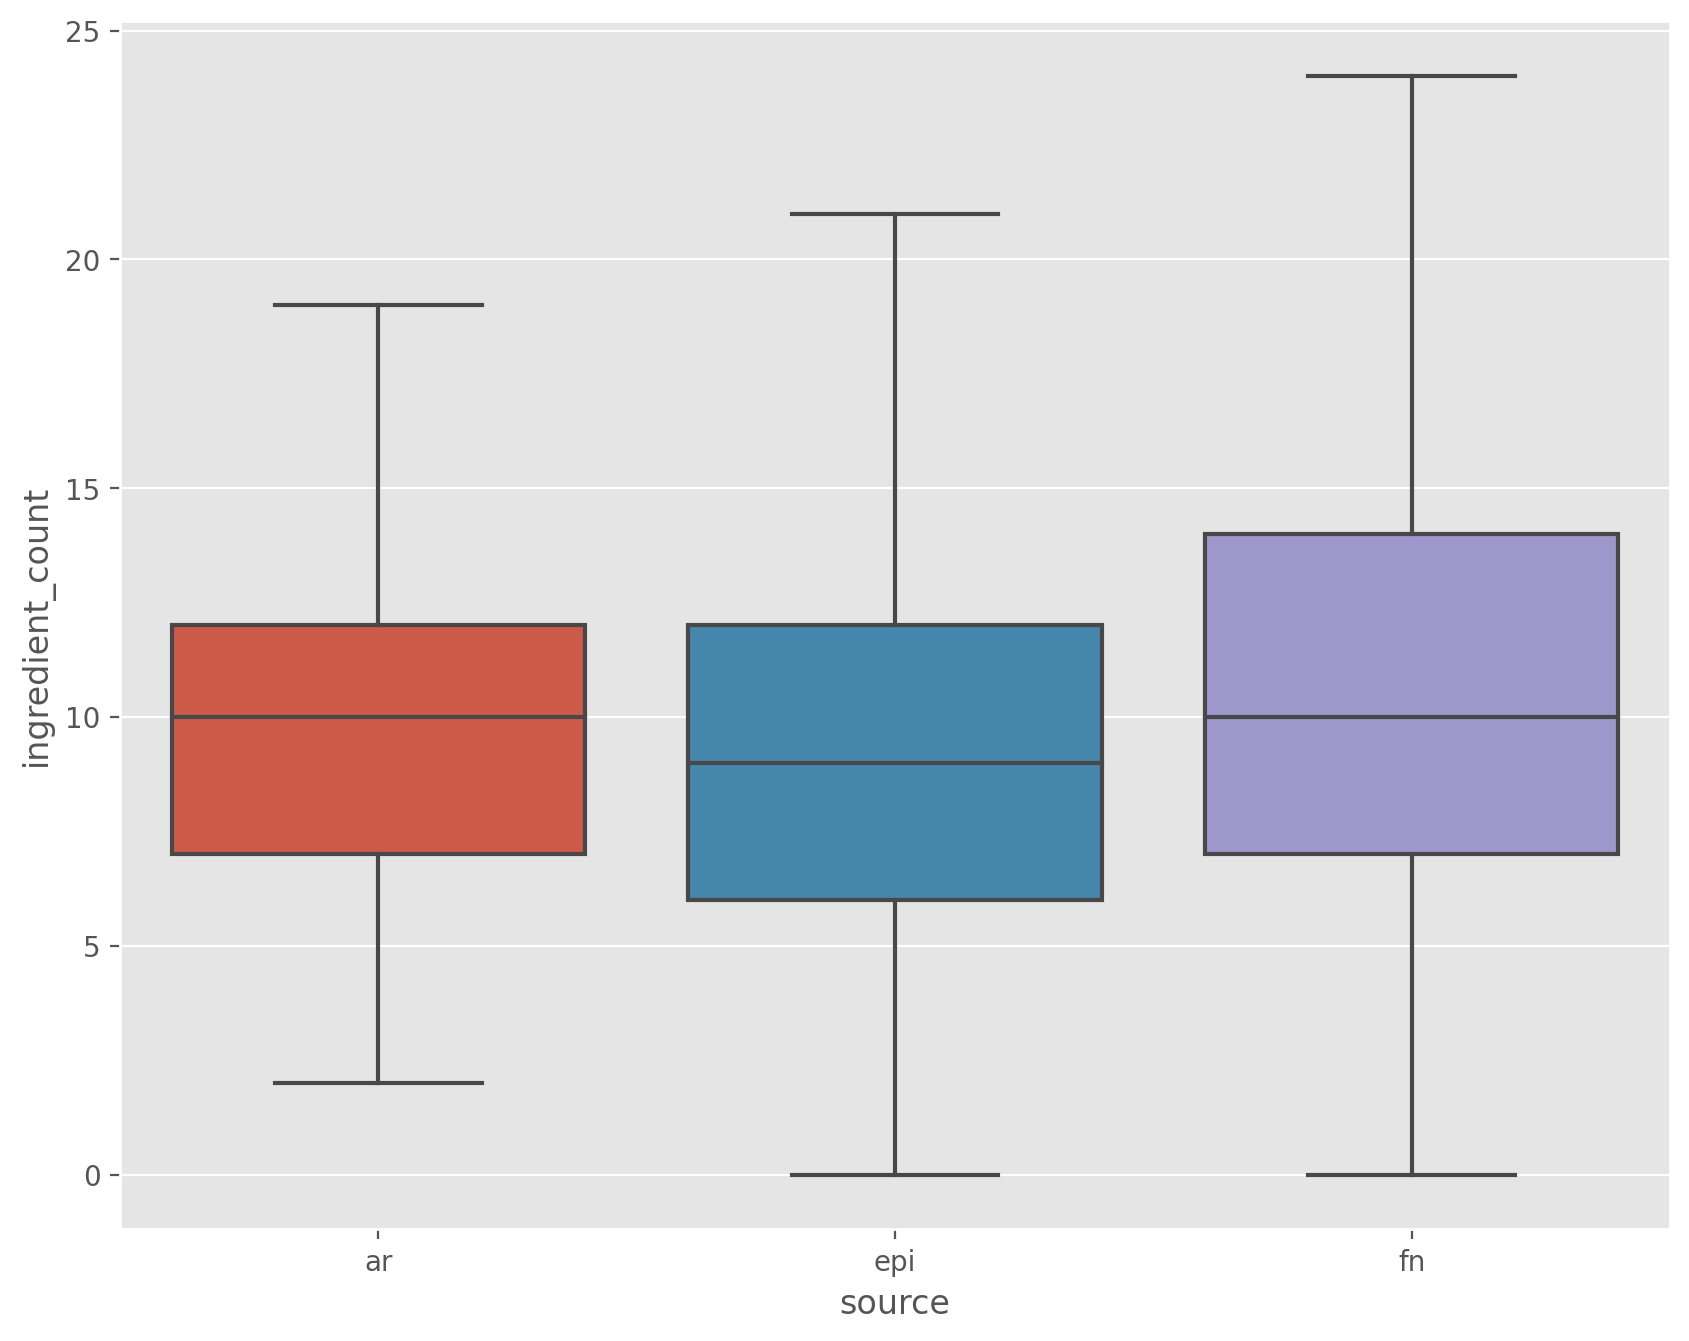

In [ ]:
# Visualize via BoxPlot

plt.figure(figsize= (10, 8))
sns.boxplot(data= df, x= 'source', y= 'ingredient_count', showfliers= False); plt.show(); # showfliers means Outliers

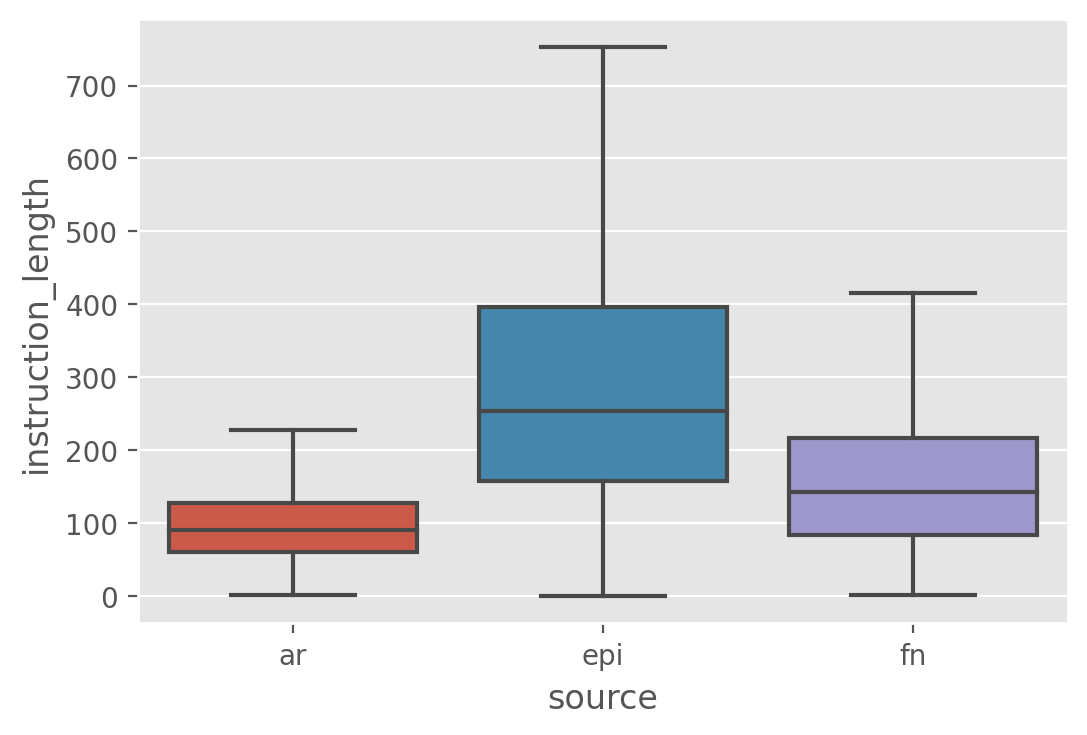

In [ ]:
sns.boxplot(data= df, x= 'source', y= 'instruction_length', showfliers= False); plt.show();

In [ ]:
# Save the DataFrame as Pickle File

df.to_pickle('data.pkl')

In [ ]:
# Dataset Preparation

# If Loading as pickle, use this

data = pd.read_pickle('data.pkl')
data.head()

,source,title,ingredients,instructions,ingredient_count,instruction_length
0,ar,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves , ...","Place the chicken, butter, soup, and onion in ...",6,53
1,ar,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",5,44
2,ar,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar , 1/2 cup ketchup ...",Preheat oven to 350 degrees F (175 degrees C)....,11,67
3,ar,Best Chocolate Chip Cookies,"[1 cup butter, softened , 1 cup white sugar , ...",Preheat oven to 350 degrees F (175 degrees C)....,12,74
4,ar,Homemade Mac and Cheese Casserole,"[8 ounces whole wheat rotini pasta , 3 cups fr...",Preheat oven to 350 degrees F. Line a 2-quart ...,14,175


In [ ]:
# Special Token used by GPT2 to mark end of 1 token (Document)

special_token = ' <|endoftext|> '

# Remove values which are too less to train - as 0 len data may skew our results

df = df[ (df.ingredient_count >= 3) & (df.instruction_length >= 10) ]
print(df.shape)

(121780, 6)


In [ ]:
# Convert the Ingredients from being in a list to string seperated by NewLine \n - Spaces are put to make sure nothing is overcomming in the words
# Goal: Ingredients: \n + Instructions: + Special_token

df['combined'] = ' \n Ingredients: \n ' + df.ingredients.str.join(' \n ') + \
' \n Instructions: \n ' + df.instructions + special_token

In [ ]:
# Validate the Combined Value

print(df.iloc[100].ingredients , '\n')
print(df.iloc[100].instructions , '\n')
print('---'*30)
print(df.iloc[100].combined , '\n')

['1/2 cup butter, melted ', '2 eggs, beaten ', '1 (8.5 ounce) package dry corn bread mix ', '1 (15 ounce) can whole kernel corn, drained ', '1 (14.75 ounce) can creamed corn ', '1 cup sour cream ', ''] 

Preheat oven to 350 degrees F (175 degrees C), and lightly grease a 9x9 inch baking dish. In a medium bowl, combine butter, eggs, corn bread mix, whole and creamed corn and sour cream. Spoon mixture into prepared dish. Bake for 45 minutes in the preheated oven, or until the top is golden brown.  

------------------------------------------------------------------------------------------
 
 Ingredients: 
 1/2 cup butter, melted  
 2 eggs, beaten  
 1 (8.5 ounce) package dry corn bread mix  
 1 (15 ounce) can whole kernel corn, drained  
 1 (14.75 ounce) can creamed corn  
 1 cup sour cream  
  
 Instructions: 
 Preheat oven to 350 degrees F (175 degrees C), and lightly grease a 9x9 inch baking dish. In a medium bowl, combine butter, eggs, corn bread mix, whole and creamed corn and sour 

In [ ]:
# Save the DataFrame as Pickle File

df.to_pickle('df_recipes_preprocessed.pkl')

In [ ]:
# Create Train and Test sets -> 98% and 2% probab

dataset_train = df[:120000].combined.values
dataset_val = df[120000:].combined.values

In [ ]:
# Export the splits
with open('dataset_train.txt', 'w') as f:
    # This would be a list. So we join them via Newline
    f.write('\n'.join(dataset_train))

with open('dataset_val.txt', 'w') as f:
    # This would be a list. So we join them via Newline
    f.write('\n'.join(dataset_val))

In [5]:
# Using GPT2 Pretrained Model (Formulation)

from transformers import AutoTokenizer, AutoModelForCausalLM # CausalLM is used to generate new words based on History

We use Distilled GPT:

**It Means In Normal Model:**<br>
Input > Huge Model > Label (During Training)

(Once Trained)
Input > Huge Model >Predictions

**In Distilled Model:** <br>
During Training:
Input > smaller_distilled_model > Predictions [of huge models] (during Training)

Smaller model learns dark knowledge(Knowledge that big model has) but it might not be present in the Label -> Kind of Transfer Learning

This is what the DistilledGPT does



In [ ]:
# Initialize Tokenizer - Converts Raw text to Numbers belonging to their Preloaded Vocabulary/Dictionary 
tokenizer = AutoTokenizer.from_pretrained('distilgpt2')

# Initialize the Model
model = AutoModelForCausalLM.from_pretrained('distilgpt2') # It is Half the size of Original GPT2

In [ ]:
# Create a text variable to see how GPT2 works

prompt_text = "Yesterday, I walked to the Shop, and"

# Encode the Text
encoded_prompt = tokenizer.encode(prompt_text, add_special_tokens= True,
                                  return_tensors= 'pt') # Return Tensors as pt as we work with Pytorch Model. 'tf' is used for Tensorflow Model | Be cautious about Tensors (error)
print(encoded_prompt)

tensor([[28065,    11,   314,  6807,   284,   262, 13705,    11,   290]])


In [ ]:
# use GPT2 Model to Generate the Output

output_sequences = model.generate( input_ids= encoded_prompt,
               max_length= 700, # Number of Tokens to Generate
               temperature= 0.92, # Close to 0 is More Deterministic(produces same thing everytime), 1 is changing. Temperature is How it changes probablity before O/P on softmax
               top_k= 25, # Has to do with outer Decoding (eg: these 5(K) words are highly probable). Take and build a tree structure
               top_p= 0.9, # Top Probability
               repetition_penalty= 10, # Penalizing for repetance of words (1 to Infinity) 
               do_sample= True,
               num_return_sequences= 2 )  # No of Different sequences to return

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [ ]:
# Decode the First Predictions from the GPT Model

tokenized_first_out = tokenizer.decode(output_sequences[0])
print(tokenized_first_out)

Yesterday, I walked to the Shop, and noticed a bunch of people that were selling some sort Ofo-tastic Tiki Bar (which you can see on their website) from other vendors. The store was full:
The only place they could find someone like me is my own Cafe for free! They have such amazing service so far in our area where we serve Japanese food as well!! So why did these customers buy something called Nogoro? And who do this guy know how long it takes him if he doesn't order anything because there are lots more items coming out all around Japan?! How about an 8 month old boy with no idea what type(s)? Well…I'll tell ya...the first thing at home would be your favorite item here..a tanteel!!! Oh yeah….and then one day she'd get her gift!!!! Yummy!<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>


In [ ]:
# Get the Documentation for the Generate
model.generate?

In [ ]:
# Train the Model on our Training Set

# Upload run_lm_finetuning -> https://github.com/huggingface/transformers/tree/master/examples (Loaded on our Directory)

# Create a bash file (experiment.sh)

"""
mkdir experiments

for epoch in 10    # Training Model Loop
do
	python run_lm_finetuning.py \
	--model_name_or_path distilgpt2 \ # What Model to use
	--model_type gpt2 \
	--train_data_file dataset_train.txt \ # Our Training Data
	--output_dir experiments/epochs_$epoch \
	--do_train \ # Flag to Tell the Model to Train
	--overwrite_output_dir \
	--per_device_train_batch_size 5 \ # No of Batch size
	--num_train_epochs $epoch
done
"""

'\nmkdir experiments\n\nfor epoch in 10\ndo\n\tpython run_lm_finetuning.py \t--model_name_or_path distilgpt2 \t--model_type gpt2 \t--train_data_file dataset.txt \t--output_dir experiments/epochs_$epoch \t--do_train \t--overwrite_output_dir \t--per_device_train_batch_size 1 \t--num_train_epochs $epoch\n\tcommandN\ndone\n'

In [ ]:
# Running the Instance of the Bash Script| !scp - security copy
!bash run_experiments.sh

# It will train the Model for more than 6 hrs. We already have a Pretrained Model with us

mkdir: cannot create directory ‘experiments’: File exists
2020-08-10 14:15:47.383601: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Traceback (most recent call last):
  File "run_lm_finetuning.py", line 29, in <module>
    from transformers import (
  File "/usr/local/lib/python3.6/dist-packages/transformers/__init__.py", line 23, in <module>
    from .configuration_albert import ALBERT_PRETRAINED_CONFIG_ARCHIVE_MAP, AlbertConfig
  File "/usr/local/lib/python3.6/dist-packages/transformers/configuration_albert.py", line 18, in <module>
    from .configuration_utils import PretrainedConfig
  File "/usr/local/lib/python3.6/dist-packages/transformers/configuration_utils.py", line 25, in <module>
    from .file_utils import CONFIG_NAME, cached_path, hf_bucket_url, is_remote_url
  File "/usr/local/lib/python3.6/dist-packages/transformers/file_utils.py", line 55, in <module>
    import tensorflow as tf
  File "/usr/local/

In [28]:
# Load the Pretrained Model - Model with 10 Epochs run and 8 hrs Train time

# Read in our Trained Tokenizer - The Full Folder is considered with json objects and texts

tokenizer = AutoTokenizer.from_pretrained('/content/drive/My Drive/Projects/GPT - 2/Natural Language Processing to Generate New Recipes/TrainedModels/Model_10_epochs')

In [29]:
# Validate the Model
model = AutoModelForCausalLM.from_pretrained('/content/drive/My Drive/Projects/GPT - 2/Natural Language Processing to Generate New Recipes/TrainedModels/Model_10_epochs')

In [30]:
# Check how the Model performs

with open('/content/drive/My Drive/Projects/GPT - 2/Natural Language Processing to Generate New Recipes/Dataset_Created/dataset_val.txt', 'r') as f:
    data = f.read()

In [31]:
special_token = " <|endoftext|> "

# Split our Dataset based on special_token occurrence

data = data.split(special_token)

# Validate
print(data[0])

 
 Ingredients: 
 4 tablespoons unsalted butter 
 1 onion, diced 
 1 carrot, peeled and diced 
 1 celery rib, washed and diced 
 4 ears corn, husked and kernels removed 
 6 baby red new potatoes, unpeeled, washed and diced 
 1 quart clam juice 
 1 cup dry white wine 
 3 1/2 pounds Littleneck clams, Manila clams or Cockles in the shell 
 1 Italian Roma tomato, cored, seeded and diced 
 1 red bell pepper, cored, seeded and diced 
 1 jalapeno chile, stemmed, seeded, if desired 
 1 bunch cilantro, leaves only, chopped 
 Juice of 1 lime 
 1/2 teaspoon freshly ground black pepper 
 Salt to taste 
 Instructions: 
 Melt the butter in a large stockpot over moderate heat. Saute the onions for 10 minutes. Add the carrots, celery, corn and potatoes and saute 2 minutes longer. Pour in the clam juice. Bring to a boil, reduce to a simmer and cook 30 minutes. Meanwhile, bring the white wine to a boil in a large saucepan and reduce by one-third. Add the clams, cover and steam, shaking the pan occasiona

In [36]:
# Feed the Model everyting up until Instructions to make the Model predict Instructions

prompt_text = data[0].split('Instructions:')[0] + '\n Instructions: \n' # Predict what comes after instructions
print(prompt_text)

 
 Ingredients: 
 4 tablespoons unsalted butter 
 1 onion, diced 
 1 carrot, peeled and diced 
 1 celery rib, washed and diced 
 4 ears corn, husked and kernels removed 
 6 baby red new potatoes, unpeeled, washed and diced 
 1 quart clam juice 
 1 cup dry white wine 
 3 1/2 pounds Littleneck clams, Manila clams or Cockles in the shell 
 1 Italian Roma tomato, cored, seeded and diced 
 1 red bell pepper, cored, seeded and diced 
 1 jalapeno chile, stemmed, seeded, if desired 
 1 bunch cilantro, leaves only, chopped 
 Juice of 1 lime 
 1/2 teaspoon freshly ground black pepper 
 Salt to taste 
 
 Instructions: 



In [37]:
# Predict the Instructions: 

encoded_prompt = tokenizer.encode(prompt_text,
                                  add_special_tokens= False,
                                  return_tensors = 'pt') # it is a must, as without this there may be heavy unidentifyiable errors

In [38]:
# use GPT2 Model to Generate the Output

output_sequences = model.generate( input_ids= encoded_prompt,
               max_length= 700, # Number of Tokens to Generate
               temperature= 0.9, # Close to 0 is More Deterministic(produces same thing everytime), 1 is changing. Temperature is How it changes probablity before O/P on softmax
               top_k= 20, # Has to do with outer Decoding (eg: these 5(K) words are highly probable). Take and build a tree structure
               top_p= 0.9, # Top Probability
               repetition_penalty= 4, # Penalizing for repetance of words (1 to Infinity) 
               do_sample= True,
               num_return_sequences= 4 )  # No of Different sequences to return

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [39]:
# Iterate over Output Sequences

for i, sequence in enumerate(output_sequences):
    result = tokenizer.decode(sequence)
    # If Many endtokens occur, cut the string
    #result = result[:result.index(special_token)]
    print('----'*25)
    print(f"Generated Output #{i + 1}")
    print('----'*25)
    print(result)
    print('\n')

----------------------------------------------------------------------------------------------------
Generated Output #1
----------------------------------------------------------------------------------------------------
 
 Ingredients: 
 4 tablespoons unsalted butter 
 1 onion, diced 
 1 carrot, peeled and diced 
 1 celery rib, washed and diced 
 4 ears corn, husked and kernels removed 
 6 baby red new potatoes, unpeeled, washed and diced 
 1 quart clam juice 
 1 cup dry white wine 
 3 1/2 pounds Littleneck clams, Manila clams or Cockles in the shell 
 1 Italian Roma tomato, cored, seeded and diced 
 1 red bell pepper, cored, seeded and diced 
 1 jalapeno chile, stemmed, seeded, if desired 
 1 bunch cilantro, leaves only, chopped 
 Juice of 1 lime 
 1/2 teaspoon freshly ground black pepper 
 Salt to taste 
 
 Instructions: 
 Melt 2 teaspoons salt into a heavy pot over medium heat. Add half-and pound butter; set aside until melted; add onions (or more) along with carrots as they begin

In [40]:
# Create our own Test set

prompt_text = "Ingredients: \n 5 eggs \n butter \n cheese \n breadcrumbs \n mayonnaise \n Instructions: \n"

# Predict the Instructions: 

encoded_prompt = tokenizer.encode(prompt_text,
                                  add_special_tokens= False,
                                  return_tensors = 'pt') # it is a must, as without this there may be heavy unidentifyiable errors

# use GPT2 Model to Generate the Output

output_sequences = model.generate( input_ids= encoded_prompt,
               max_length= 700, # Number of Tokens to Generate
               temperature= 0.9, # Close to 0 is More Deterministic(produces same thing everytime), 1 is changing. Temperature is How it changes probablity before O/P on softmax
               top_k= 20, # Has to do with outer Decoding (eg: these 5(K) words are highly probable). Take and build a tree structure
               top_p= 0.9, # Top Probability
               repetition_penalty= 4, # Penalizing for repetance of words (1 to Infinity) 
               do_sample= True,
               num_return_sequences= 4 )  # No of Different sequences to return

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [41]:
# Iterate over Output Sequences of Output

for i, sequence in enumerate(output_sequences):
    result = tokenizer.decode(sequence)
    # If Many endtokens occur, cut the string
    #result = result[:result.index(special_token)]
    print('----'*25)
    print(f"Generated Output #{i + 1}")
    print('----'*25)
    print(result)
    print('\n')

----------------------------------------------------------------------------------------------------
Generated Output #1
----------------------------------------------------------------------------------------------------
Ingredients: 
 5 eggs 
 butter 
 cheese 
 breadcrumbs 
 mayonnaise 
 Instructions: 
 Preheat oven to 375 degrees F. In a mixing bowl, combine flour and salt; mix well using your hands or an electric mixer until mixture resembles coarse meal. Add the egg yolks 1 at time while mixing on low speed until smooth after each addition (the batter will be stiff). Gently fold in chopped green onion with 2 tablespoons of grated Parmesan cheeses. Spread dough evenly into greased 9 by 13 inch baking pan and bake for 45 minutes.; Combine all ingredients except oil and olive canola oils together for frying, place in blender. Blend just before adding it but do not puree! Pour oil/oil-canela paste onto surface then use knife as aid if necessary to prevent lumps from forming. Heat oil 